In [2]:
pip install reverse_geocoder

  Stored in directory: C:\Users\Teja\AppData\Local\pip\Cache\wheels\47\05\50\b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import reverse_geocoder as rg 

data=pd.read_csv(r'C:\Users\Teja\Desktop\IDS proj\waves.csv')
data=data.iloc[1114:];


print("--------------------------")

data_corr=data.corr(method='pearson')
for i in data_corr.index:
	for j in data_corr.columns:
		if(data_corr.loc[i,j]>0.5 or data_corr.loc[i,j]<-0.5):
			if(i!=j and not(i in ['COUNTRY','STATE/PROVINCE','LOCATION','MEASUREMENT_TYPE','VALIDITY']) and not(j in ['COUNTRY','STATE/PROVINCE','LOCATION','MEASUREMENT_TYPE','VALIDITY'])):
				temp_data=data.loc[:,[i,j]].dropna()
				X=np.array(temp_data[i]).reshape(-1,1)
				y=np.array(temp_data[j]).reshape(-1,1)

				X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
				regr = LinearRegression(n_jobs=-1)
				regr.fit(X_train, y_train)
				
				#print(regr.score(X_test, y_test))
				if(regr.score(X_test, y_test)>0.5):
					slope=regr.coef_[0][0]
					intercept=regr.intercept_[0]
					#print("slope=",slope)
					#print("intercept=",intercept)
					
					for a in data.index:
						if(np.isnan(data.loc[a,j]) and not(np.isnan(data.loc[a,i]))):
							data.loc[a,j]=(slope)*data.loc[a,i]+intercept
					
							
#print(data)

data.loc[:,['INJURIES','INJURY_ESTIMATE','FATALITIES','FATALITY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS','DAMAGE_ESTIMATE','HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE','HOUSES_DESTROYED','HOUSE_DESTRUCTION_ESTIMATE']]=data.loc[:,['INJURIES','INJURY_ESTIMATE','FATALITIES','FATALITY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS','DAMAGE_ESTIMATE','HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE','HOUSES_DESTROYED','HOUSE_DESTRUCTION_ESTIMATE']].round(0)




for i in data['INJURIES'].index:
	if(np.isnan(data.loc[i,'INJURIES']) and not(np.isnan(data.loc[i,'INJURY_ESTIMATE']))):
		if(data.loc[i,'INJURY_ESTIMATE']==0):
			data.loc[i,'INJURIES']=0
		elif(data.loc[i,'INJURY_ESTIMATE']==1):
			data.loc[i,'INJURIES']=25
		elif(data.loc[i,'INJURY_ESTIMATE']==2):
			data.loc[i,'INJURIES']=76
		elif(data.loc[i,'INJURY_ESTIMATE']==3):
			data.loc[i,'INJURIES']=551
		else:
			data.loc[i,'INJURIES']=1001



for i in data['FATALITIES'].index:
	if(np.isnan(data.loc[i,'FATALITIES']) and not(np.isnan(data.loc[i,'FATALITY_ESTIMATE']))):
		if(data.loc[i,'FATALITY_ESTIMATE']==0):
			data.loc[i,'FATALITIES']=0
		elif(data.loc[i,'FATALITY_ESTIMATE']==1):
			data.loc[i,'FATALITIES']=25
		elif(data.loc[i,'FATALITY_ESTIMATE']==2):
			data.loc[i,'FATALITIES']=76
		elif(data.loc[i,'FATALITY_ESTIMATE']==3):
			data.loc[i,'FATALITIES']=551
		else:
			data.loc[i,'FATALITIES']=1001
			
			
for i in data['DAMAGE_MILLIONS_DOLLARS'].index:
	if(np.isnan(data.loc[i,'DAMAGE_MILLIONS_DOLLARS']) and not(np.isnan(data.loc[i,'DAMAGE_ESTIMATE']))):
		if(data.loc[i,'DAMAGE_ESTIMATE']==0):
			data.loc[i,'DAMAGE_MILLIONS_DOLLARS']=0
		elif(data.loc[i,'DAMAGE_ESTIMATE']==1):
			data.loc[i,'DAMAGE_MILLIONS_DOLLARS']=0.5
		elif(data.loc[i,'DAMAGE_ESTIMATE']==2):
			data.loc[i,'DAMAGE_MILLIONS_DOLLARS']=3
		elif(data.loc[i,'DAMAGE_ESTIMATE']==3):
			data.loc[i,'DAMAGE_MILLIONS_DOLLARS']=15
		else:
			data.loc[i,'DAMAGE_MILLIONS_DOLLARS']=25


for i in data['HOUSES_DAMAGED'].index:
	if(np.isnan(data.loc[i,'HOUSES_DAMAGED']) and not(np.isnan(data.loc[i,'HOUSE_DAMAGE_ESTIMATE']))):
		if(data.loc[i,'HOUSE_DAMAGE_ESTIMATE']==0):
			data.loc[i,'HOUSES_DAMAGED']=0
		elif(data.loc[i,'HOUSE_DAMAGE_ESTIMATE']==1):
			data.loc[i,'HOUSES_DAMAGED']=25
		elif(data.loc[i,'HOUSE_DAMAGE_ESTIMATE']==2):
			data.loc[i,'HOUSES_DAMAGED']=76
		elif(data.loc[i,'HOUSE_DAMAGE_ESTIMATE']==3):
			data.loc[i,'HOUSES_DAMAGED']=551
		else:
			data.loc[i,'HOUSES_DAMAGED']=1001	
		
for i in data['HOUSES_DESTROYED'].index:
	if(np.isnan(data.loc[i,'HOUSES_DESTROYED']) and not(np.isnan(data.loc[i,'HOUSE_DESTRUCTION_ESTIMATE']))):
		if(data.loc[i,'HOUSE_DESTRUCTION_ESTIMATE']==0):
			data.loc[i,'HOUSES_DESTROYED']=0
		elif(data.loc[i,'HOUSE_DESTRUCTION_ESTIMATE']==1):
			data.loc[i,'HOUSES_DESTROYED']=25
		elif(data.loc[i,'HOUSE_DESTRUCTION_ESTIMATE']==2):
			data.loc[i,'HOUSES_DESTROYED']=76
		elif(data.loc[i,'HOUSE_DESTRUCTION_ESTIMATE']==3):
			data.loc[i,'HOUSES_DESTROYED']=551
		else:
			data.loc[i,'HOUSES_DESTROYED']=1001


data.drop(['SOURCE_ID','WAVE_ID','TRAVEL_TIME_MINUTES','INJURIES','INJURY_ESTIMATE','VALIDITY','FIRST_MOTION'],axis=1,inplace=True)

for i in data.index:
	if(data.loc[i,:].count()<len(data.columns)/2):
		data.drop(i,axis=0,inplace=True)	
#print(data['STATE/PROVINCE']);
k=1


for i in data.index:
	if(pd.isnull(data.loc[i,'STATE/PROVINCE'])):
		if(not(pd.isnull(data.loc[i,'LATITUDE']) and pd.isnull(data.loc[i,'LONGITUDE']))):
			coordinates=((data.loc[i,'LATITUDE']),(data.loc[i,'LONGITUDE']))
			result = rg.search(coordinates)
			data.loc[i,'STATE/PROVINCE']=result[0]['admin2']
			print(result[0]['admin2'])
			
print(data.describe())	
print(data.head())

data.to_csv('waves_cleaned.csv')


--------------------------


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import reverse_geocoder as rg 
import statistics
from collections import Counter

data=pd.read_csv(r'C:\Users\Teja\Desktop\IDS proj\waves_cleaned.csv')
print(data.describe())



temp={}
for i in data.index:
	if(not pd.isnull(data.loc[i,'COUNTRY'])):
		if(data.loc[i,'COUNTRY'] not in temp):
			temp[data.loc[i,'COUNTRY']]=[]
		if(not(pd.isnull(data.loc[i,'STATE/PROVINCE']))):
			temp[data.loc[i,'COUNTRY']].append(data.loc[i,'STATE/PROVINCE'])
	else:
		data.drop(i,axis=0,inplace=True)


		
for i in temp:
	if(temp[i]!=[]):
		temp[i]=[Counter(temp[i]).most_common(1)[0][0]]
	
#print(temp)

temp_data=DataFrame.from_dict(temp,orient='index')


#print(temp_data)	

for i in data.index:
	if(pd.isnull(data.loc[i,'STATE/PROVINCE'])):
		data.loc[i,'STATE/PROVINCE']=temp_data.loc[data.loc[i,'COUNTRY'],0];

data[['REGION_CODE','COUNTRY','STATE/PROVINCE','LOCATION','YEAR','MONTH','DAY','MEASUREMENT_TYPE','FATALITY_ESTIMATE','DAMAGE_ESTIMATE','HOUSE_DAMAGE_ESTIMATE','HOUSE_DESTRUCTION_ESTIMATE']]=data[['REGION_CODE','COUNTRY','STATE/PROVINCE','LOCATION','YEAR','MONTH','DAY','MEASUREMENT_TYPE','FATALITY_ESTIMATE','DAMAGE_ESTIMATE','HOUSE_DAMAGE_ESTIMATE','HOUSE_DESTRUCTION_ESTIMATE']].fillna(method='ffill')


data[['REGION_CODE','COUNTRY','STATE/PROVINCE','LOCATION','YEAR','MONTH','DAY','MEASUREMENT_TYPE','FATALITY_ESTIMATE','DAMAGE_ESTIMATE','HOUSE_DAMAGE_ESTIMATE','HOUSE_DESTRUCTION_ESTIMATE']]=data[['REGION_CODE','COUNTRY','STATE/PROVINCE','LOCATION','YEAR','MONTH','DAY','MEASUREMENT_TYPE','FATALITY_ESTIMATE','DAMAGE_ESTIMATE','HOUSE_DAMAGE_ESTIMATE','HOUSE_DESTRUCTION_ESTIMATE']].fillna(method='bfill')

for i in ['LATITUDE','LONGITUDE','DISTANCE_FROM_SOURCE','TRAVEL_TIME_HOURS','PERIOD','MAXIMUM_HEIGHT','HORIZONTAL_INUNDATION','FATALITIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DAMAGED','HOUSES_DESTROYED']:
	data[i].fillna(data[i].mean(),inplace=True)
	
data.loc[:,['FATALITIES','HOUSES_DAMAGED','HOUSES_DESTROYED']]=data.loc[:,['FATALITIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DAMAGED','HOUSES_DESTROYED']].round(0)



data.to_csv('waves_cleaned2.csv')


               YEAR         MONTH           DAY   REGION_CODE      LATITUDE  \
count  24550.000000  24544.000000  24515.000000  24550.000000  24431.000000   
mean    1979.551527      6.077208     15.303896     81.148880     21.495111   
std       41.437044      3.486908      8.445290      9.138915     25.077800   
min     1802.000000      1.000000      1.000000     30.000000    -77.850000   
25%     1960.000000      3.000000     11.000000     81.000000      5.344500   
50%     2003.000000      5.000000     12.000000     85.000000     34.333000   
75%     2011.000000      9.000000     23.000000     85.000000     39.033708   
max     2017.000000     12.000000     31.000000     89.000000     70.250000   

          LONGITUDE  DISTANCE_FROM_SOURCE  TRAVEL_TIME_HOURS  \
count  24431.000000          24341.000000       24341.000000   
mean      50.204934           2537.155242           3.788802   
std      122.388743           4265.999918           6.217143   
min     -179.876000            -

In [2]:
from sklearn import preprocessing
from pandas import DataFrame
import pandas as pd

data=pd.read_csv('waves_cleaned2.csv')

data[['LATITUDE','LONGITUDE','DISTANCE_FROM_SOURCE','TRAVEL_TIME_HOURS','PERIOD','MAXIMUM_HEIGHT','HORIZONTAL_INUNDATION','FATALITIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DAMAGED','HOUSES_DESTROYED']]=preprocessing.normalize(data[['LATITUDE','LONGITUDE','DISTANCE_FROM_SOURCE','TRAVEL_TIME_HOURS','PERIOD','MAXIMUM_HEIGHT','HORIZONTAL_INUNDATION','FATALITIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DAMAGED','HOUSES_DESTROYED']])

data.to_csv('waves_normalized.csv')


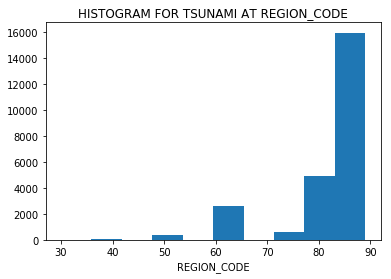

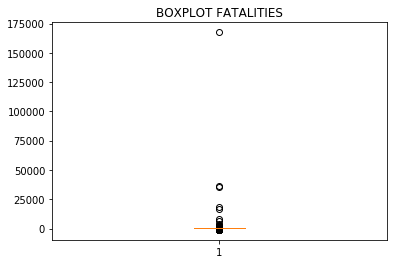

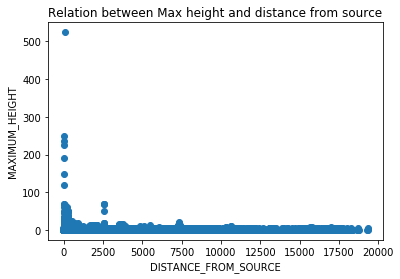

In [3]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from collections import Counter 

data=pd.read_csv('waves_cleaned2.csv');

plt.hist(data['REGION_CODE'])
plt.xlabel("REGION_CODE")

plt.title("HISTOGRAM FOR TSUNAMI AT REGION_CODE")
plt.show()
plt.close()
plt.boxplot(data['FATALITIES'])
plt.title("BOXPLOT FATALITIES")
plt.show()
plt.close()
plt.scatter(data['DISTANCE_FROM_SOURCE'].values,data['MAXIMUM_HEIGHT'].values)
plt.xlabel("DISTANCE_FROM_SOURCE")
plt.ylabel("MAXIMUM_HEIGHT")
plt.title("Relation between Max height and distance from source")
plt.show()
plt.close()




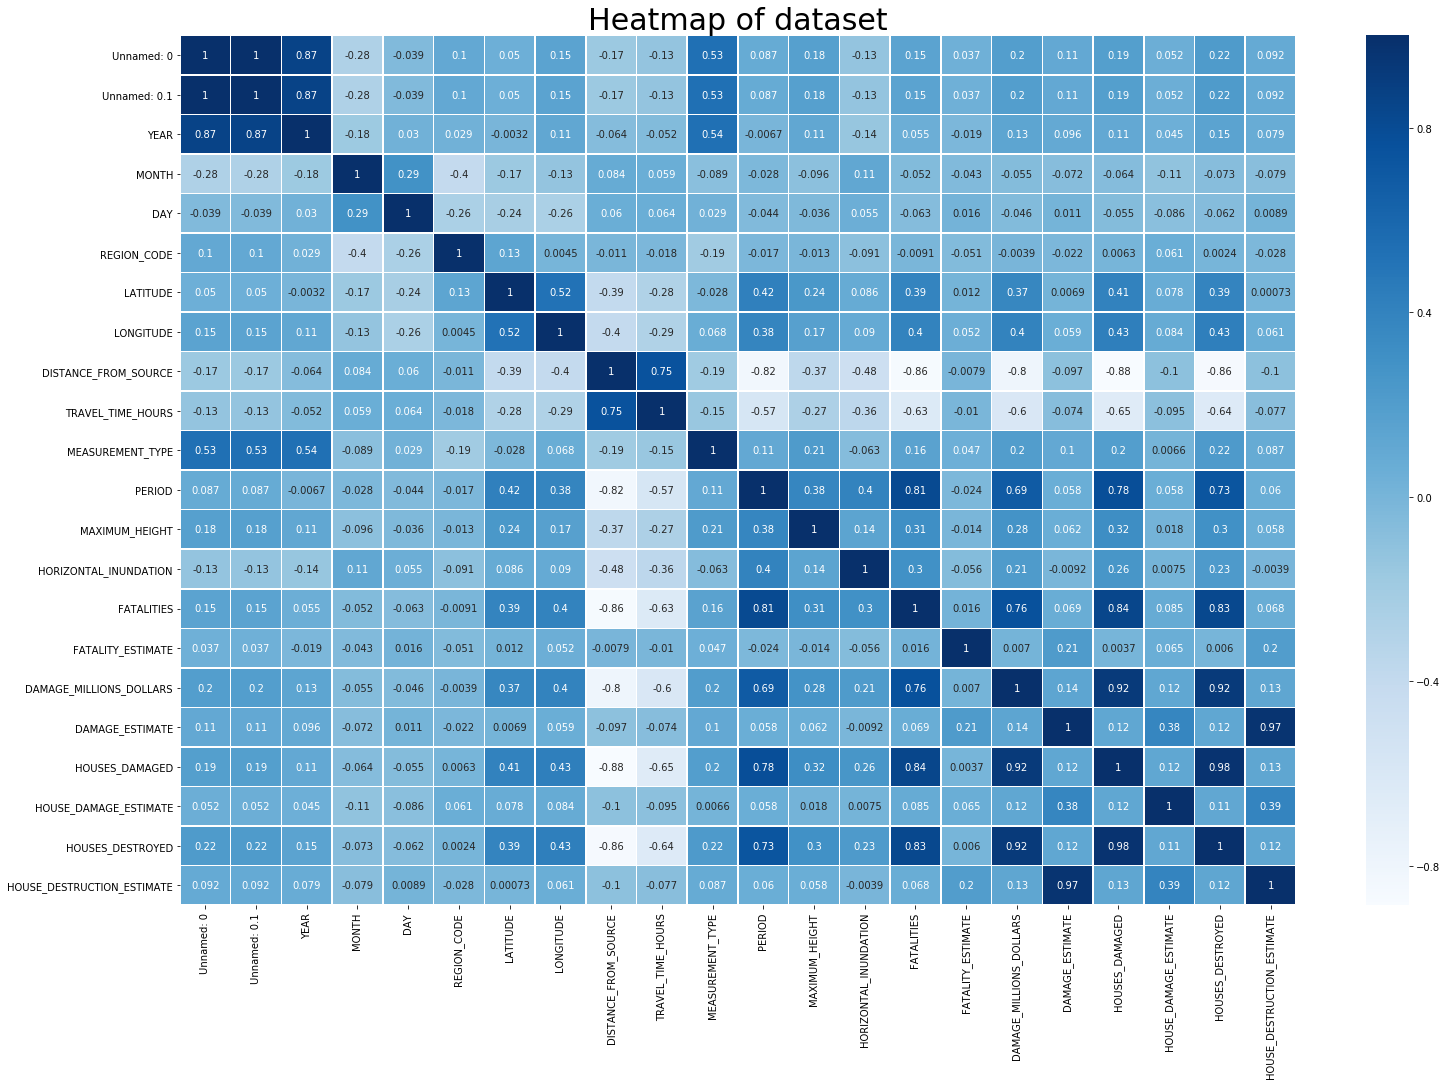

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv('waves_normalized.csv')
x=dataset.columns.values

x=np.array(x)

df=pd.DataFrame(dataset,columns=x)
df.sample(5)

plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[x].corr(),annot = True, linewidths=0.5,cmap='Blues')
hm.set_title(label='Heatmap of dataset',fontsize=30)
hm;
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

dataset = pd.read_csv("waves_cleaned2.csv")
x = dataset.loc[:,'LATITUDE']
y = dataset.loc[:,['LONGITUDE']]

x = np.array(x) #travel time
y = np.array(y)#maxheight

x = x.flatten()
y = y.flatten()

a = []
for i in range(0,1200):
    k = np.random.randint(24000)
    a.append(x[k])


b=[]
for i in range(0,1200):
    k = np.random.randint(24000)
    b.append(y[k])


print("NULL HYPOTESIS:mean latitude=23.141")
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(a, x2=None, value=23.141)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

print("NULL HYPOTESIS:mean longitude=52")
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(b, x2=None, value=52)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


NULL HYPOTESIS:mean latitude=23.141
0.23008125334532425
accept null hypothesis
NULL HYPOTESIS:mean longitude=52
0.8586023984718204
accept null hypothesis
